In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from rocketpy import Function
from mpl_toolkits.mplot3d import Axes3D

In [10]:
df = pd.read_csv(r'Lift coeff completo.csv')

df.dropna(inplace = True)

# Ennvironment
rho = 1.09

# Desired Parameters
timeMax = 3
thetaDotMax = 9 #given in radians per second
thetaDotDotMax = (0 - thetaDotMax)/timeMax

# Europa
J = 0.077
V0 = 25
r = 127/2000
Lr = 2 * r
Ar = np.pi * r**2

# Fin set
N = 4
root = 0.15
tip = 0.06
span = 0.15
delta = 2 * np.pi / 180

# Canards set 
n = 4
Cr = 60 / 1000
Ct = 60 / 1000
s = 100 / 1000
alfa = 11 * np.pi / 180

In [11]:
YtCanard = (r + s/3 * ((Cr + 2 * Ct) / (Cr + Ct))) # it is the Canard's "arm"
YtFins = (r + span/3 * ((root + 2 * tip) / (root + tip))) # it is the Fin's "arm"

def cnalfa(cnalfa0, Cr, Ct, s, r, N):
    Aref = np.pi * r**2
    Af = (Cr + Ct) * s / 2; # fin area
    AR= 2 * (s**2) / Af
    gamac = np.arctan( (Cr - Ct) / (2 * s) ); # mid chord angle
    FD = 2 * np.pi * AR / (cnalfa0 *np.cos(gamac))
    return cnalfa0 * FD * (Af/Aref) * np.cos(gamac) * (N/2) / (2 + FD * ( 1 + (4/FD**2) )**0.5) 

In [12]:
alpha = [a/2 for a in range(0, 30)]
V = [v/20 for v in range(2, 16)]

X,Y = np.meshgrid(alpha, V)

Z = []
for i in range(len(X)):
    temp=[]
    for j in range(len(X[i])):
        if Y[i][j]*10 % 1!= 0:
            temp.append(n/2 * cnalfa(float(df['M='+ str(Y[i][j])][X[i][j]*2]), Cr, Ct, s, r, n))
        else:
            temp.append(n/2 * cnalfa(float(df['M='+ str(Y[i][j]) + '0'][X[i][j]*2]), Cr, Ct, s, r, n))
    Z.append(temp)
Z = np.array(Z)

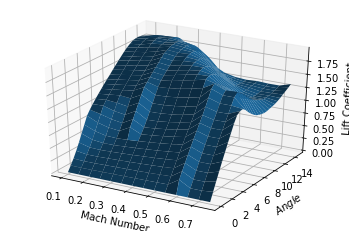

In [13]:
fig = plt.figure()
sub = fig.add_subplot(111,projection = "3d")
sub.plot_surface(Y, X, Z)
sub.set_xlabel('Mach Number')
sub.set_ylabel('$Angle$')
sub.set_zlabel('Lift Coefficient')
sub.yaxis._axinfo['label']['space_factor'] = 3.0
fig.show()

In [14]:
print(df)

    Alpha      M=0.10   Alpha        M=0.15   Alpha.1        M=0.20   Alpha.2  \
0     0.0   -2.53E-08     0.0 -1.260000e-09       0.0 -2.060000e-09       0.0   
1     0.5  0.05336856     0.5  5.197851e-02       0.5  5.300915e-02       0.5   
2     1.0   0.1095934     1.0  1.043777e-01       1.0  1.062606e-01       1.0   
3     1.5   0.1747082     1.5  1.584482e-01       1.5  1.592742e-01       1.5   
4     2.0   0.2484585     2.0  2.169425e-01       2.0  2.130569e-01       2.0   
5     2.5   0.3284181     2.5  2.828895e-01       2.5  2.697614e-01       2.5   
6     3.0   0.4086297     3.0  3.594625e-01       3.0  3.324803e-01       3.0   
7     3.5   0.4907368     3.5  4.362426e-01       3.5  4.043763e-01       3.5   
8     4.0   0.5423757     4.0  5.139055e-01       4.0  4.800470e-01       4.0   
9     4.5   0.5866997     4.5  5.920468e-01       4.5  5.545296e-01       4.5   
10    5.0   0.6292411     5.0  6.408590e-01       5.0  6.304044e-01       5.0   
11    5.5   0.6703083     5.